In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [44]:
profiles = pd.read_csv("CSV Files/customer_profiles.csv")
details = pd.read_csv("CSV Files/ad_details.csv")
events = pd.read_csv("CSV Files/ad_events.csv")

In [45]:
events = events.drop_duplicates(subset='customer', keep='first')

df = pd.merge(profiles, events, left_on='id', right_on='customer', how='outer')

df = df.drop('id', axis=1)

df.insert(0, 'id', df.pop('customer'))

df = df.fillna(df.median())

In [46]:
df = df.drop('became_member_on (year month day)', axis=1)
df = df.drop('id', axis=1)

In [50]:
# Before encoding, drop irrelevant columns
df_encoded = df

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df_encoded, columns=['gender', 'ever_married', 'home_state', 'event', 'event_info'])

# Standardize numerical features
scaler = StandardScaler()
numerical_features = ['age', 'income', 'kids', 'time']
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

# # Apply t-SNE
# model = TSNE(n_components=2, random_state=0)
# tsne_data = model.fit_transform(df_encoded)

# Apply K-Means
model = KMeans(init='k-means++', n_clusters=3)
segments = model.fit_predict(df_encoded)

# Add cluster labels to DataFrame
df['cluster'] = segments

# Group by cluster labels
cluster_groups = df.groupby('cluster')

# Get the mode (most frequent value) of each feature within each cluster
cluster_features = cluster_groups.apply(lambda x: x.mode().iloc[0])

# Drop irrelevant columns
cluster_features = cluster_features.drop(['cluster'], axis=1)

# Print the features shared by each cluster
for i, cluster in cluster_features.iterrows():
    print(f"\nCluster {i+1} Features:")
    print(cluster)


Cluster 1 Features:
0
gender                                                         M
age                                                         55.0
income                                                   64000.0
ever_married                                                 Yes
kids                                                         2.0
home_state                                               Florida
event                                             offer received
event_info      {'offer id': '2906b810c7d4411798c6938adc9daaa5'}
time                                                       168.0
Name: 0, dtype: object

Cluster 2 Features:
0
gender                                                         M
age                                                         55.0
income                                                   64000.0
ever_married                                                 Yes
kids                                                         2.0
home_state           

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


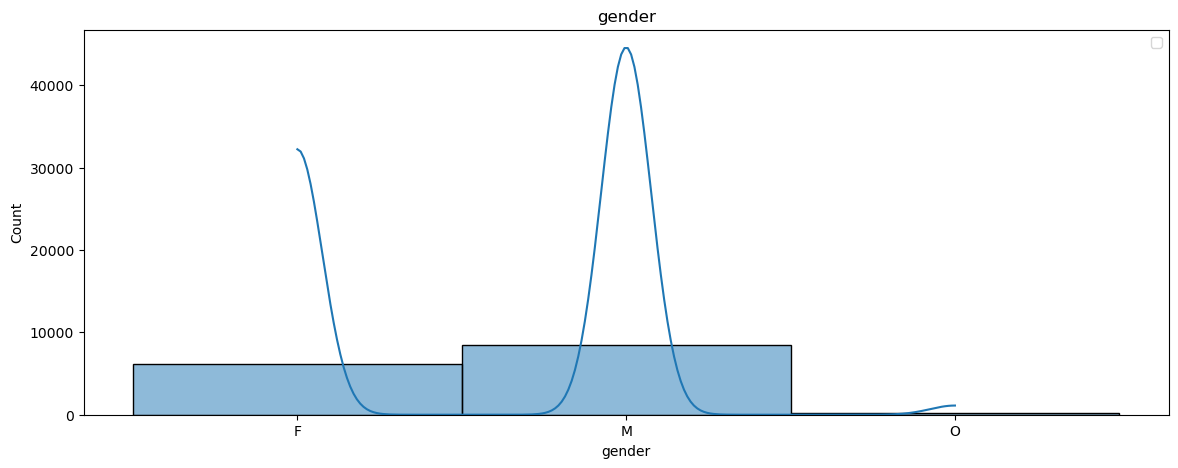

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


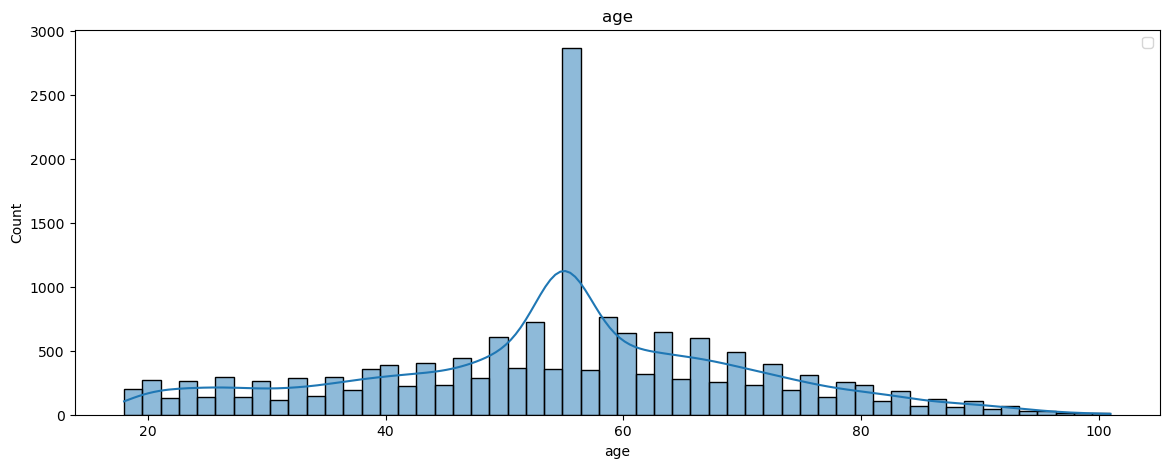

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


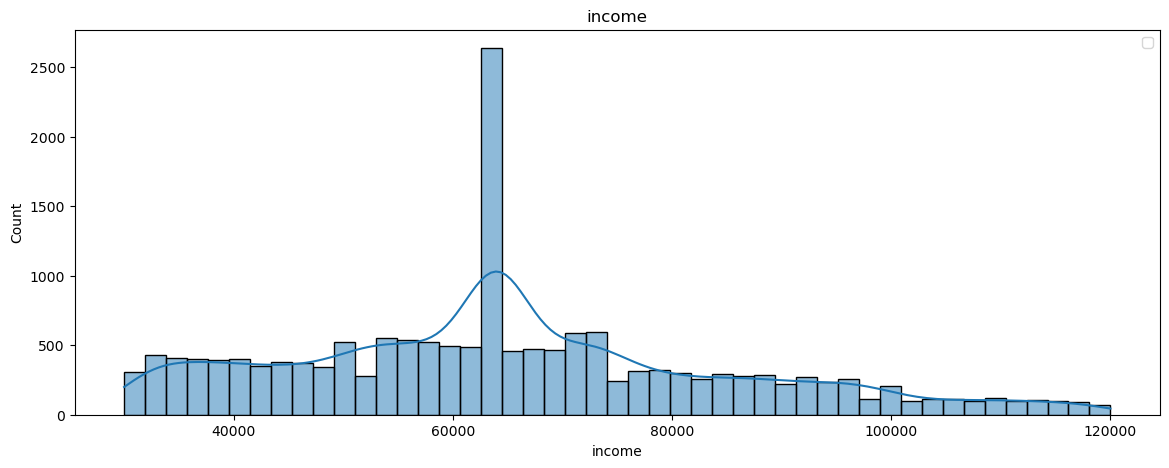

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


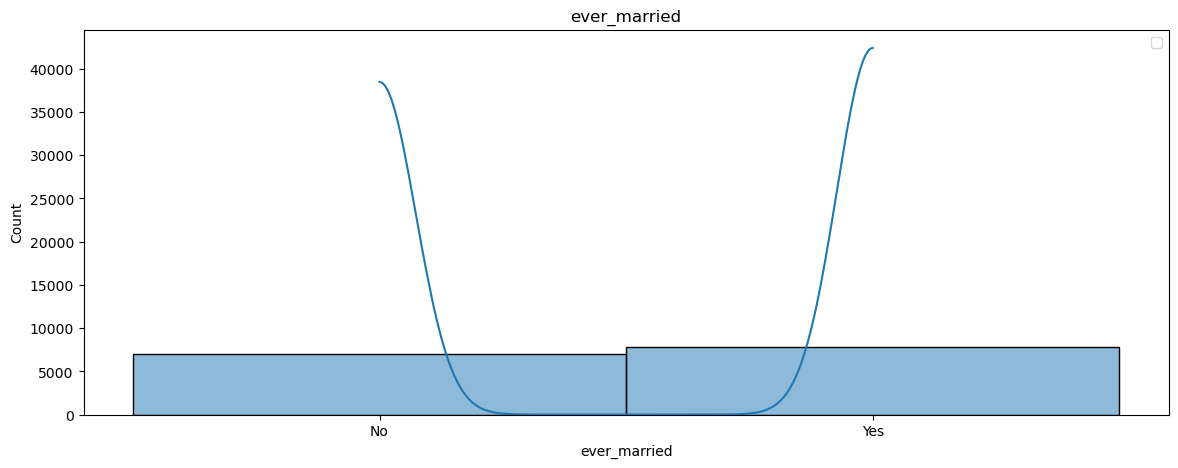

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


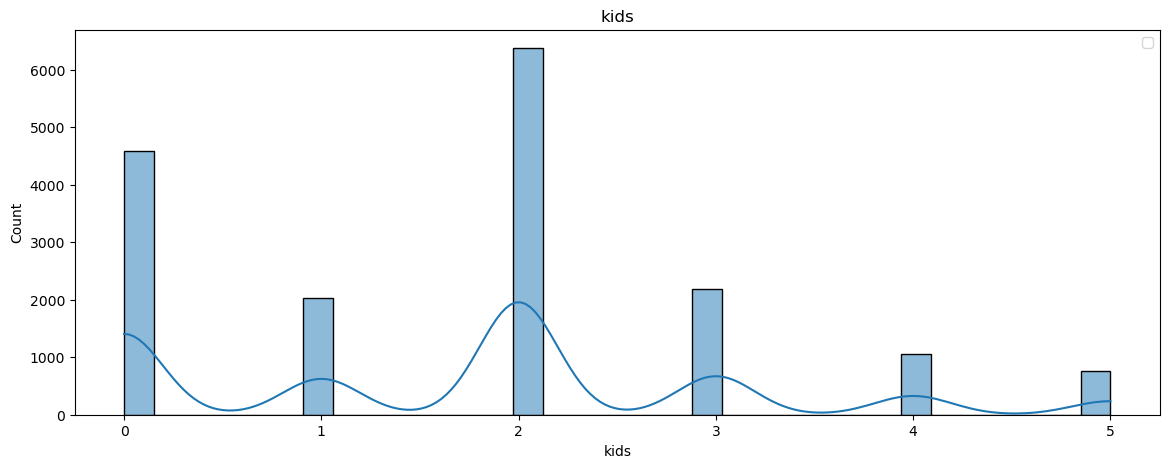

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


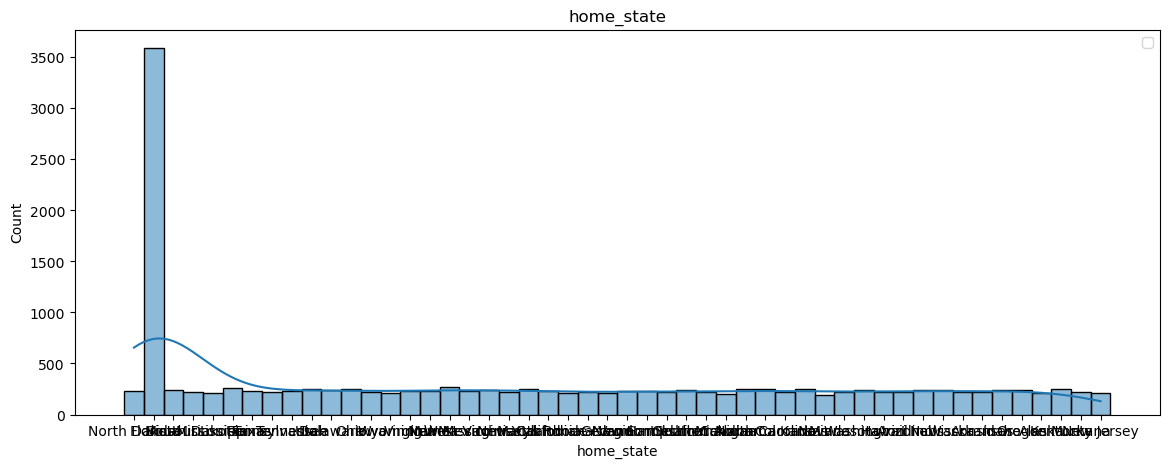

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


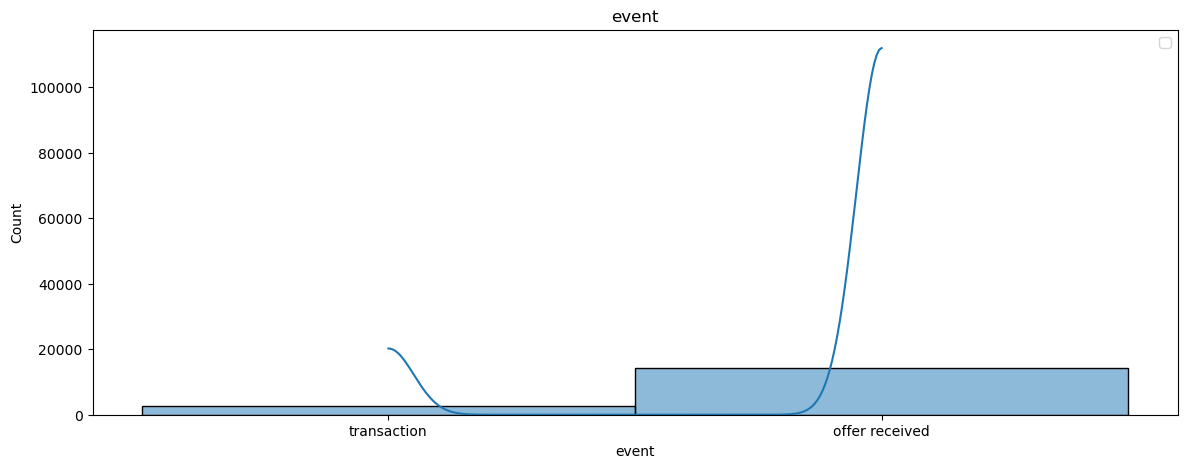

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


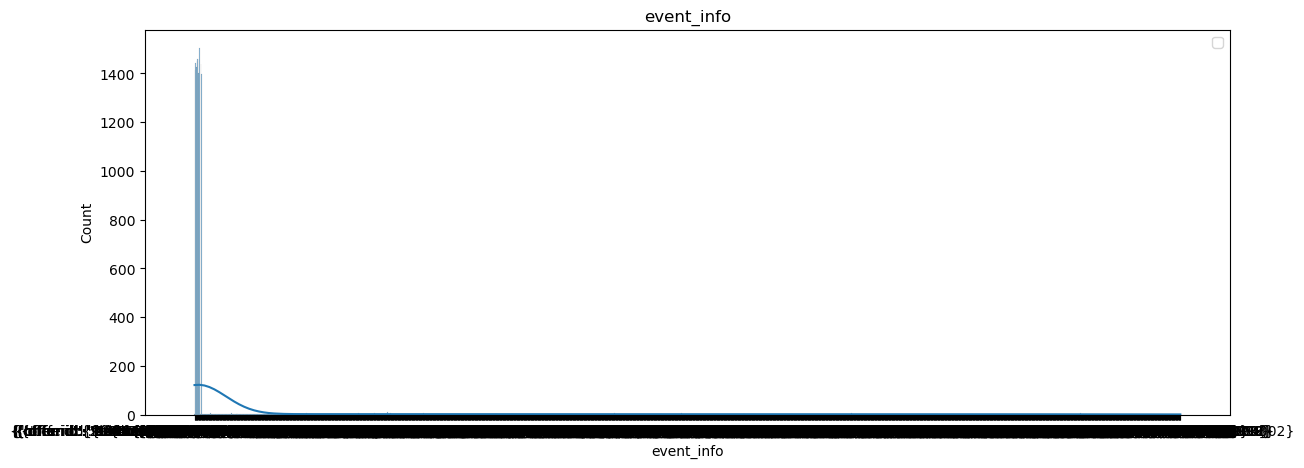

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


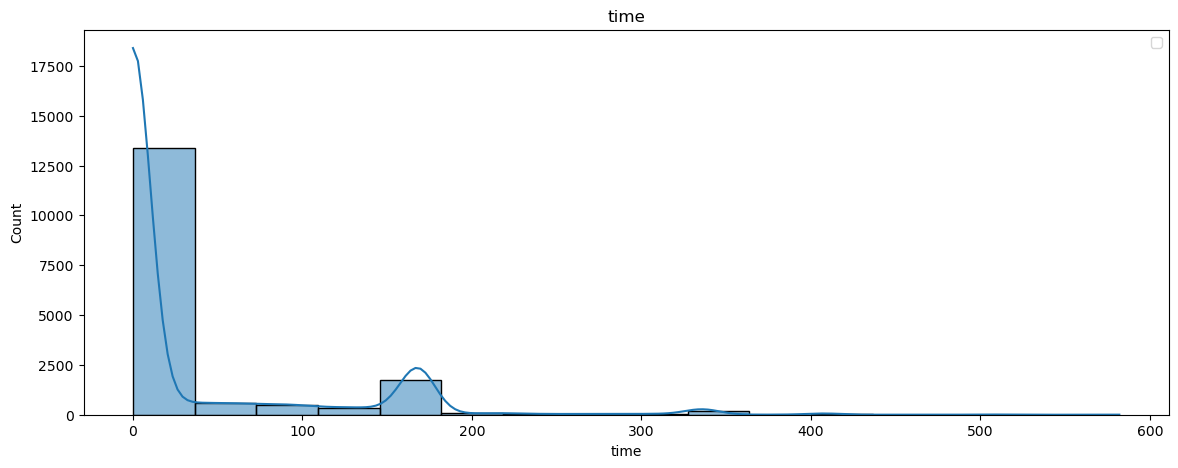

In [52]:
for feature in df.columns:
    if feature != 'cluster':
        plt.figure(figsize=(14, 5))
        sns.histplot(df[feature], kde=True)
        plt.title(feature)
        plt.legend()
        plt.show()

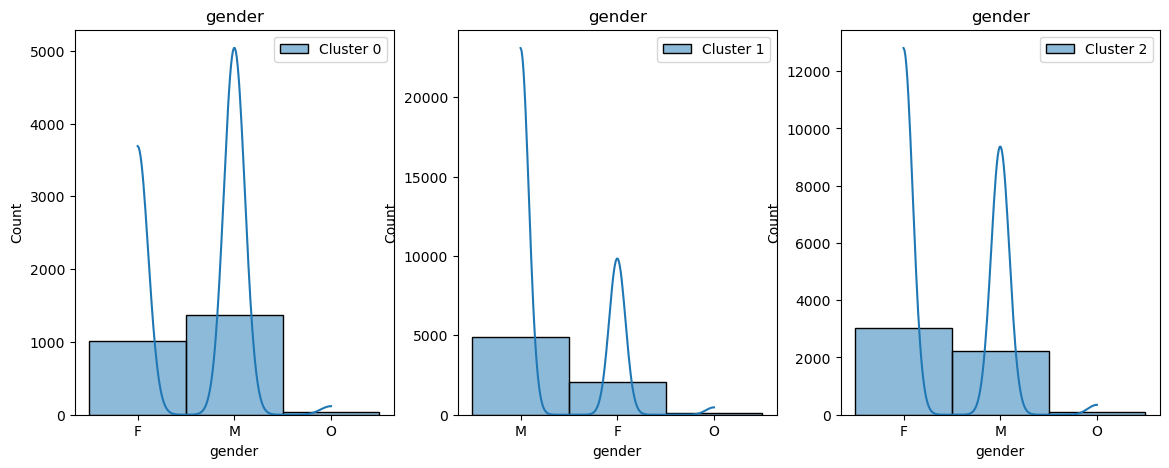

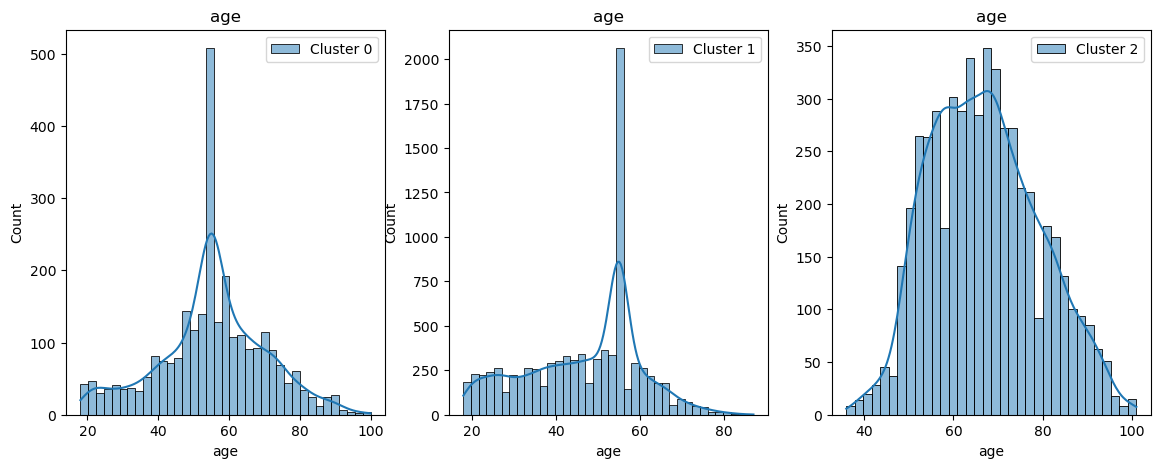

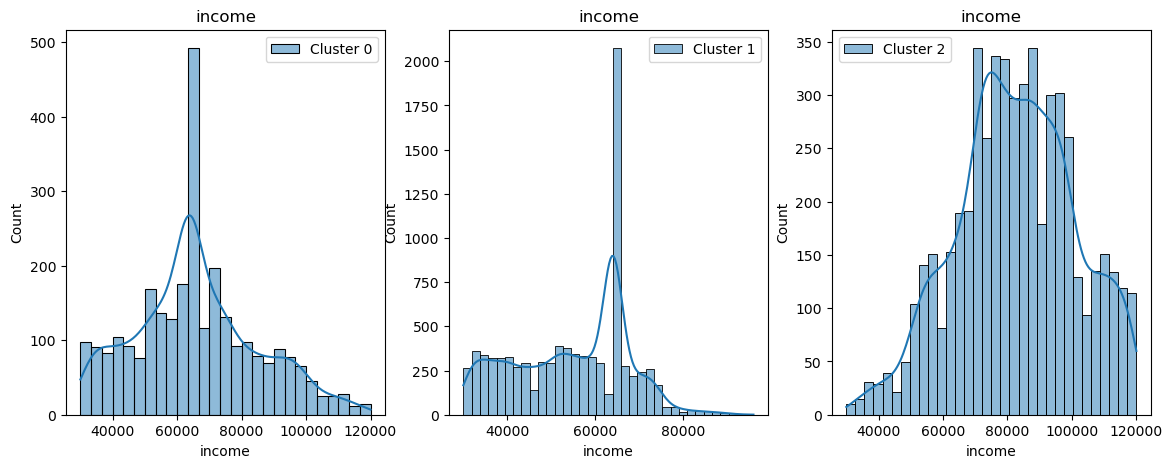

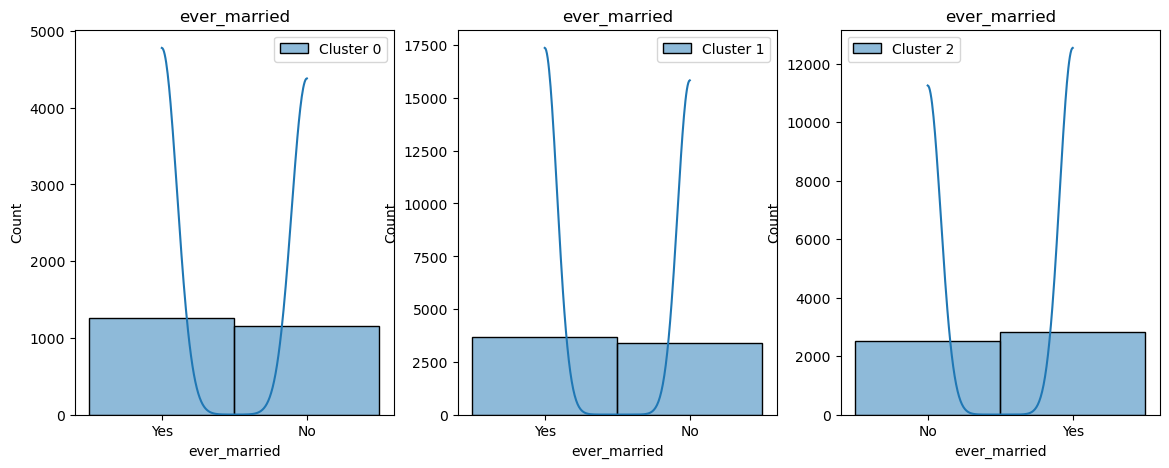

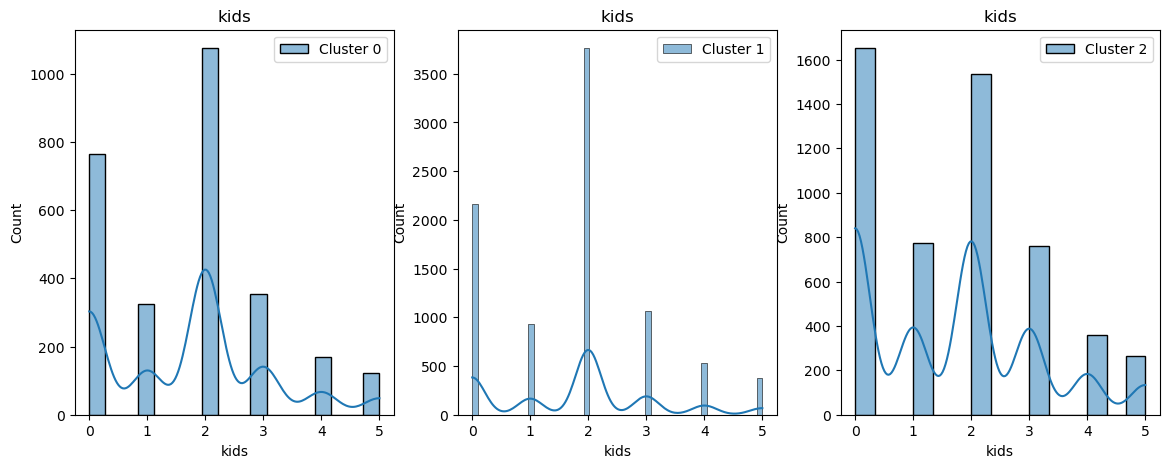

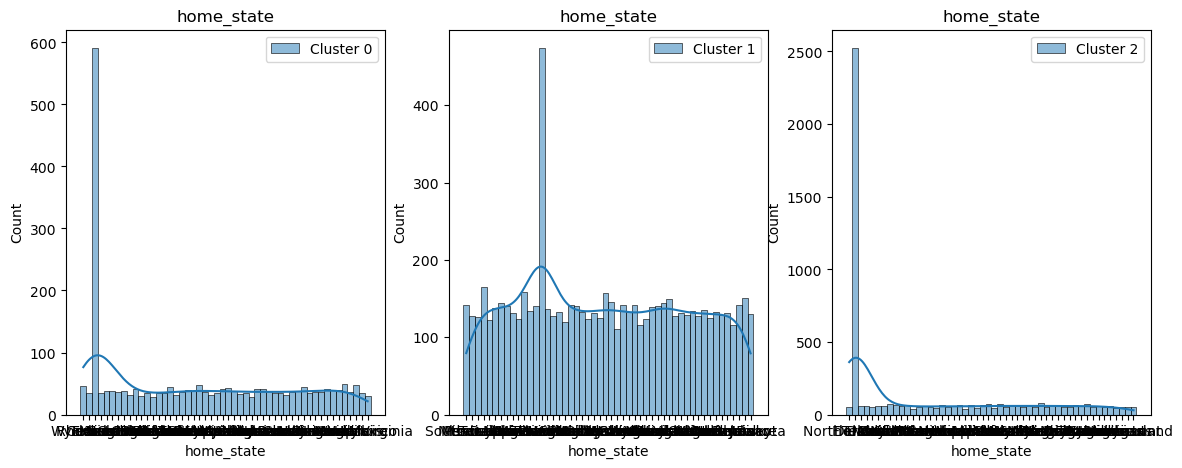

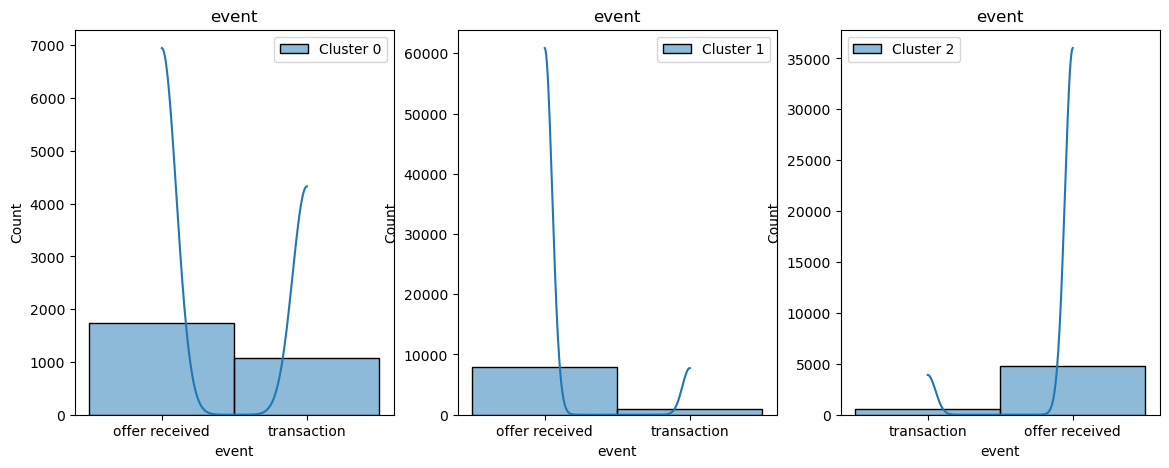

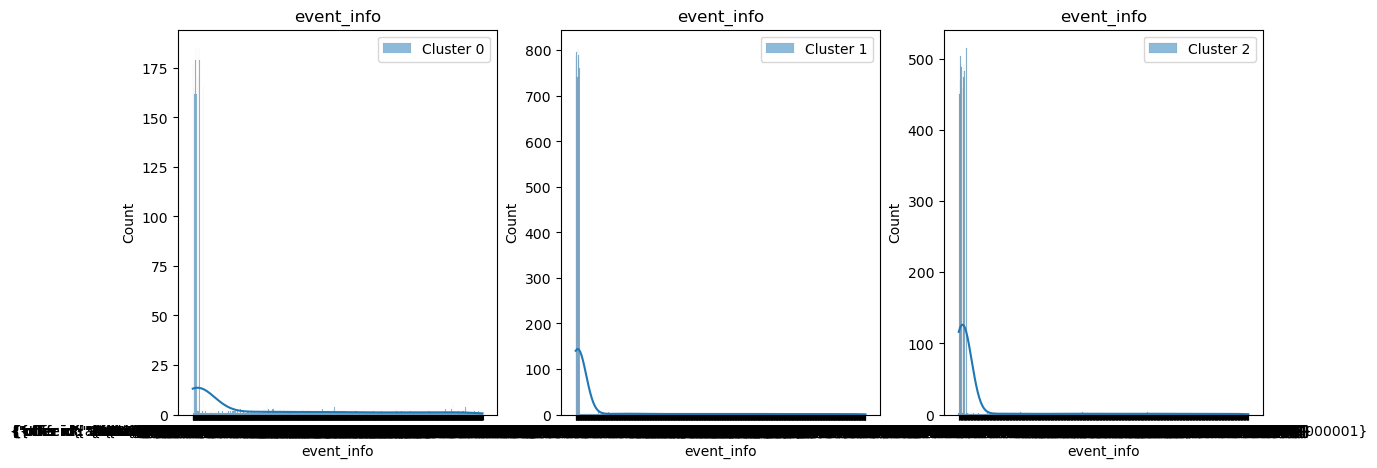

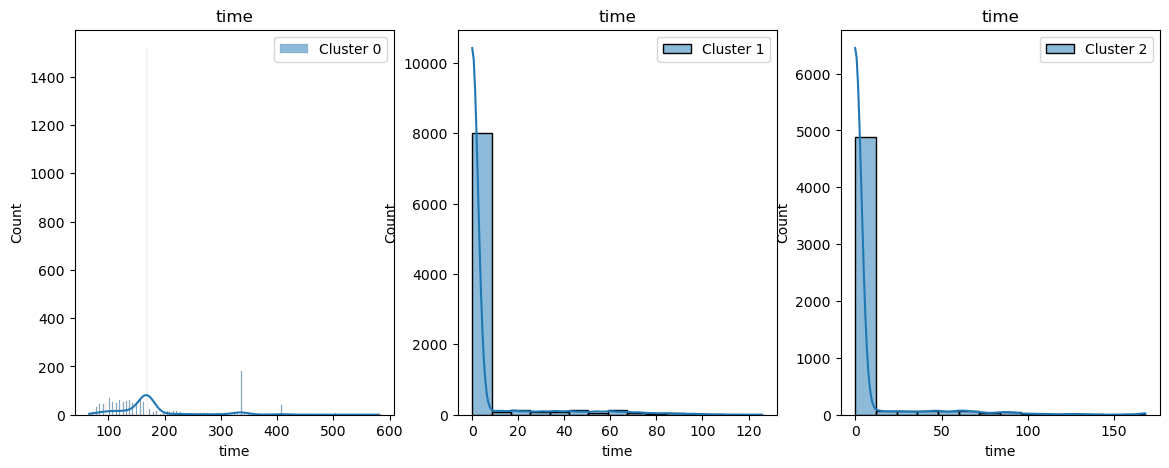

In [53]:
for feature in df.columns:
    if feature != 'cluster':
        plt.figure(figsize=(14, 5))
        for i, (cluster, data) in enumerate(cluster_groups):
            plt.subplot(1, len(cluster_groups), i + 1)
            sns.histplot(data[feature], kde=True, label=f'Cluster {cluster}')
            plt.title(feature)
            plt.legend()
        plt.show()